### En este notebook se aplicarán algoritmos básicos de Machine Learning para el dataset de Iris

* Se usará la librería de scikit-learn
* Se usará los algoritmos de Regresión Lineal, Regresión Logística y Radom Forest

In [2]:
# Importamos las librerías de manejo numérico y procesamiento de datos.
import numpy as np
import pandas as pd

In [3]:
# Importamos sckit-learn que es nuestra librería básica para utilizar algoritmos de Machine Learning.
import sklearn


In [4]:
# Importamos los datasets de scikit-learn
from sklearn import datasets

In [5]:
# Importamos la librería de scikit-learn para manejo de Regresión Lineal y Logística
from sklearn import linear_model

In [6]:
# Importamos la librería de scikit-learn para uso de clasificación de random forest
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Importamos la librería de scikit-learn para clusterización de K-Means
from sklearn.cluster import KMeans

In [8]:
# Importamos librerías para manejo del rendimiento (perfomance) de nuestros modelos.
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [9]:
# Importamos librerías para graficar.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [10]:
#Definimos el tamaño del graficado
plt.rcParams['font.size'] = 15

### Usaremos el dataset de Iris ya que es un dataset limpio y didáctico para aprender aplicar algoritmos de Machine Learnig

In [11]:
# Descargamos el dataset de Iris del modulo datasets de scikit-learn.
iris = datasets.load_iris()

# Echamos un vistazo a los datos
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### Inspeccionamos el dataset y este contiene los siguiente:
* data : que son el conjunto de datos con 150 filas y 4 columnas
* feature_name: indica el nombre de las característica o columnas del dataset,
  * sepal_lenght, sepal_width, petal_lenght, petal_width
* target: es tipicamente el objetivo que intentamos modelar
* target_names: indican las 3 especies de flores
  * setosa, vesicolor y virginica

In [12]:
# Data
print("Estos son el conjunto de datos: " ,iris.data, "\n")
# Feature_name
print("Estas son las caracteristicas del dataset: ", iris.feature_names, "\n")
# target
print("Este es el objetivo que intentamos modelar: ", iris.target, "\n")
# target_names
print("Estos son los nombres la salida o target: ", iris.target_names)

Estos son el conjunto de datos:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4

### Nuestra meta es usar los features o descritores de la planta para predecir la especie de la planta
### A continuación vamos a convertir el datasets en un dataframe para poder manipular los datos con facilidad

In [13]:
# Creamos un dataframe con los feature names.
data = pd.DataFrame(data = iris.data, columns = iris.feature_names )

# Creamos el datafreme con los targets, es decir las especies de la flor
target = pd.DataFrame(data = iris.target, columns = ['especies'])

# Unimos ambos Dataframes con concat, agrefamos una nueva columna
data = pd.concat([data, target], axis =1)

# Mezclamos en orden aleatorio
data = data.sample(frac = 1, random_state = 1234)

# Imprimimos los nuevos registros del nuevo dataframe
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


## Separando nuestro datos - training y testing
Antes de comenzar a crear nuestros modelos, es importante dividir nuestro conjunto de datos en Entranamiento (Training) y  Pruebas (Testing).

La regla general dice que la mayoria de datos debene incluirse en **entrenamiento**, los datos de entranamiento se utilizan para ayudar a nuestros modelos a aprender reglas o patrones subyacentes dentro de los datos.

El conjunto de **pruebas** debe separarse del conjunto de entrenamiento. Su objetivo es evaluar lo que hizo el modelo, lo que significa que verificamos si los patrones detectados en el modelo reflejan lo que estamos tratando de modelar.

También recordemos que existe el término **Validation (Validación)**. Esta separación del dataset se usa tipicamente para modelos más complicados donde se requieren parámetros de ajuste de un modelo. En el siguiente caso estos modelos son lo suficientemente simples como para que los datos de validación no sean necesarios.

la división de los datos se lo hace en un 80% training y 20% testing, lo que suele ser razonable de manera elemental.


In [14]:
# Fracción de entranamiento 0.8
Ntrain = int(data.shape[0]*0.8)

# Datos de entrenamiento
train = data.iloc[:Ntrain, :]

# Datos de prueba
test = data.iloc[Ntrain:, :]

In [15]:
train.shape

(120, 5)

In [16]:
test.shape

(30, 5)

## Regresión Lineal

La regresión lineal es un algoritmo que intenta predecir un valor numérico. La especie de la flor es una etiqueta o Label. Así que intentemos pensar en un modelo en el que podamos predecir la salida de un número.

Para este ejemplo supongamos que queremos predecir **petal width** o ancho del pétalo (index = 3 en el DataFrame)

Para comenzar construyamos un modelo con solo un feature, el **petal length** o largo del pétalo (index =2 en el DataFrame)

Primero veamos la relación entre el **petal length** y **petal width** en los datos:

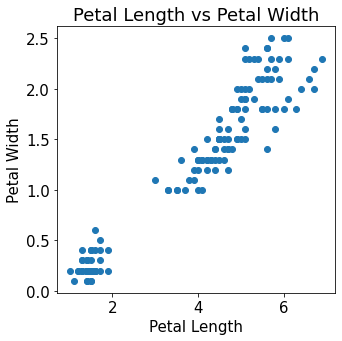

In [17]:
# Definimos variables para acceder de forma más simple a las columnas de nuestos features.
p_length = data['petal length (cm)']
p_width = data['petal width (cm)']

# Creamos la gráfica comparando petal length (eje x) vs petal width (eje y)
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(p_length, p_width)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('Petal Length vs Petal Width')
fig.tight_layout()

De lo anterior podemos ver una relación **lineal**. Queremos cuantificar ésta relación.

En la gráfica anterior ***x*** es el Petal Length y ***y*** es Petal Width. Queremos ajustar un modelo a lar forma $\theta_1*x + \theta_0 = y$, la ecuación de la recta para generar nuestra regresión lineal.

Podemos utilizar scikit-learn para construir un modelo de regresión lineal como tenemos a continuación, usando nuestros datos de entrenamiento

**Nota:** Aparecerá un molesto error ya que scikit-learn espera un input 2D (Nx1) y para solucionarlo llamamos 'pd.DataFrame' en el x-input para ajustar el comando.

In [18]:
# Importamos un objeto de regresión lineal de sklearn
model_1 = linear_model.LinearRegression()

# Ajustamos el modelo a nuestros datos de entrenamiento
model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])

# Imprimimos coeficientes.
print("Coef\n", model_1.coef_)

# Imprimos el sesgo o bías.
print("\n\nBias\n", model_1.intercept_)

Coef
 [0.41490802]


Bias
 -0.3575893142485458


El resultado anterior nos dice que $\theta_1$ , la relación con el Petal Length es de $0.41$, y el bías también llamos interceptar es de $-0.36$

En conjunto esperamos que la fórmula se vea así:
$\theta_1 * x + \theta_0 = 0.41*x - 0.36 = y$ <br>

Grafiquemos esto para observarlo.

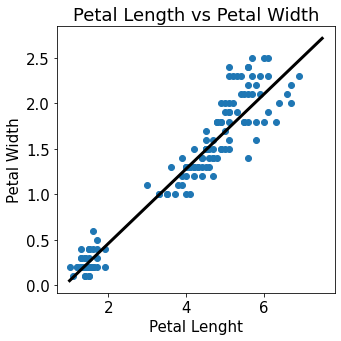

In [19]:
# Definimos variables para acceder de forma más simple a las columnas de nuestos features.
p_length = data['petal length (cm)']
p_width = data['petal width (cm)']

# definimos un arreglo desde el valor mínimo del petal length hast el máximo del petal length + 1, en pasos de 0.5.
xvals = np.arange(p_length.min(), p_length.max()+1, 0.5)

# Ecuación de nuestra regresión lineal
yvals = 0.41*xvals - 0.36

# Graficamos nuestra con los datos y nuestra ecuación
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(p_length, p_width)
ax.plot(xvals, yvals, 'k', linewidth = 3)
ax.set_xlabel("Petal Lenght")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length vs Petal Width")
fig.tight_layout()

#### No es una mala relación. Podemos dar un paso más para cuantificar "que tan bueno es el ajuste" utilizando dos métricas  de rendimiento:
* El error cuadrático medio (MSE)
* $R^2$

El valor de $R^2$ busca la correlación entre ***x*** y ***y***. Para este caso "qué tan bien se ajusta la línea a los punto de nuestros datos".

Siempre queremos un MSE bajo y $R^2$ cercano a 1. $R^2$ que está limitado de 0 (no correlacionado) a 1 (relación perfecta).

Podemos calcular nuestras métricas de rendimiento prediciendo primero en nuestro **conjunto de datos de pruebas** y luego viendo que tan buena es la estimación de nuestro modelo del Petal Width cuando se usa la Petal Length, en comparación con los valores reales del Petal Width.

In [20]:
# Predicción con model_1 = linear_model.LinearRegression() utilizando los datos de prueba.
ypredict = model_1.predict(pd.DataFrame(test.iloc[:, 2]))

#Calculamos el MSE con los valores predichos en y:
print('MSE: %.2f'%mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict))

# Calculamos R^2 con los valores predichos y.
print('R2: %.2f'% r2_score(pd.DataFrame(test.iloc[:, 3]), ypredict))

MSE: 0.04
R2: 0.94


Excelente podemos ver que existe una relación decente entre la longitud y el ancho de los pétalos

### Regresión Logística

Similar la regresión lineal, la regresión lineal ajusta una línea con los coeficientes. Sin embargo a diferencia de la regresión lineal, este modelo tiene como objetivo **clasificar datos**.

A partir del ancho de los pétalos, podemos ver que hay tres comportamientos distintos de cada una de las especies de flores. Usando el largo/ancho del sépalo y el largo/ancho del pétalo, nos gustaría clasificar a qué especie de flor pertenece cada punto de datos.

Para hacer esto podemos emplear regresión logística. En la regresión logística binaria estamos tratando de ajustar un logaritmo de relación impar, es decir, una probabilidad de un clase particular en realción con otra clase.

En este problema hay tres especies, por lo que la fórmula esta ligeramente adaptada. Afortunadamente scikit-learn puede manejar problemas de etiquetas binarias o de etiquetas múltiples con mucha facilidad.

Para construir un modelo de regresión logística se puede utilizar lo siguiente:

In [27]:
# Preparamos los datos de entrenamiento y prueba: en 'x' y 'y'
# La última columna es la etiqueta de la especie.

# Para xtrain dejamos la columna especies
xtrain = train.iloc[:, :-1] #input test

# Para ytrain dejamos solo columna especies
ytrain = train.iloc[:, -1] #output test

xtest = test.iloc[:, :-1] #input test
ytest = test.iloc[:, -1] #outputt test

# Configuramos la regresión logística con el método de regresión logística de linear_model
model_2 = linear_model.LogisticRegression()

# Ajustamos el modelo con los datos de entrenamiento
model_2.fit(xtrain, ytrain)

/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

La evaluación de la regresión logística utilizará **presición** (accuracy), o un recuento de la cantidad de veces que el modelo etiqueta correctamente un ejemplo.

Lo podemos hacer de la siguiente manera.

In [28]:
# Hacer predicciones con el conjunto de prueba
ypred =  model_2.predict(xtest)

# Imprimimos la presición o accuracity del modelo generado
print("Testing accuracy = ", accuracy_score(ytest, ypred))

Testing accuracy =  1.0


Increíblementem nuestro modelo modelo pudo obtener todos los ejemplos correctamente!

Tal hazaña solo puede ocurrir si el conjunto de prueba de los datos es separable linelamente, una condición especial en la que es realmente fácil agrupar los datos, o una línea (o plano) dibujado puede separar completamente entre todas las muestas de diferentes clases.

En problemas más complicados, es posible que necesites verificar la matriz de confusión preguntado cuales son los verdaderos positivos, verdaderos negatuvos, falsos positivos y falsos negativos. Se puede hacer esto ultilizando la matriz de confusión de scikit-learn de la siguiente forma:

In [29]:
# Ejemplo de la matriz de confusión de scikit-learn 
# Importamos el método de matriz de confusión de scikit learn
from sklearn.metrics import confusion_matrix

# Aplicamos la matriz a nuestros valores de testing y los valors de predicción generados
confusion_matrix(ytest, ypred)


array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]])

Ten en cuenta que, dado que hay tres clases, cada columna y fila individual corresponde a una clase. Las columnas corresponden a las etiquetas predichas y las filas a las etiquetas verdaderas.


### Regresión Logística - regularización

Vale la pena mirar los argumentos predeterminados de LogisticRegression de scikir-learn. A saber una cosa a buscar son los términos de **regularización** y **penalización**.

La **regularización** tiene la intención de ayudar a los modelos asegurandose de que no se ajusten demasiado. Al agregar un nuevo término a la función de perdida, el modelo penalizará al tamano de cada coeficiente en el modelo.

El **sobreajuste** o **overfitting** significa que el modelo funcionará fantásticamente en el conjunto de entrenamiento, pero horriblemnte en el conjunto de prueba (o el de validación. La regularización intenta hacer que los coeficientes de las caracterísitcas redundantes/no útiles sean lo más cercanos a 0 como sea posible, lo que significa que juegan un papel pequeño en la predicción.

En scikit-learn **penalty** o penalización se refiere al tipo de regularización, normalmente L1 o L2. Ambos métodos fomentan las escasez(lo que significa que muchos de los coeficienes delante de las características se acercan a 0). Además, la fuerza de la penalización inversa (regularización) es c. Un valor de c grande indica una menor fuerza de penalización, así que disminuye gradualmente este valor mientras intentas encontrar los features mas importantes.  

### Random Forest (bosque aleatorio)

En el último enfoque que analizaremos en el bosque aleatorio. Como estamos tratando de etiquetar entre especies, usaremos un clasificador de bosque aleatorio.

Radom Forest tiene varios argumentos de entrada. Por simplicidad solo agragaremos los n_stimators. Corresponden al número de árboles en el bosque.

In [ ]:
# Bosque aleatorio de desición (árboles de desición)
clf = RandomForestClassifier(n_estimators=3)

# Entrenamos el modelo 
clf.fit(xtrain, ytrain)

# Generamos predicción
y_pred = clf.predict(xtest)

# Probamos el modelo con accuracy
print("Testing accuracy = ", accuracy_score(ytest, ypred))


Dado este dataset de juguete, el modelo es capaz de conseguir perfección en la prueba "accuracy"(100% o 1)
Con datos de un caso real y menos "perfecto"